# Data Analysis for COVID19
----------------------------------------------

###  IMPORTING THE MODULES

In [20]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset for COVID19


In [21]:
Dataset_Corona=pd.read_csv("Covid19_Confirmed_dataset.csv")
Dataset_Corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [22]:
Dataset_Corona.drop(["Lat","Long"],axis=1,inplace=True)

### Computing the rows by the country


In [24]:
corona_dataset_computed = Dataset_Corona.groupby("Country/Region").sum()  
corona_dataset_computed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


###  Visualizing the data for Some Countries 

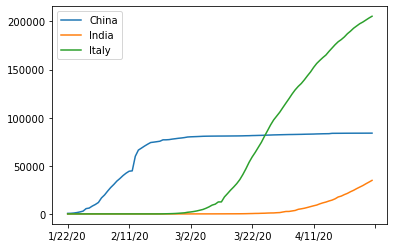

In [25]:
corona_dataset_computed.loc["China"].plot()
corona_dataset_computed.loc["India"].plot()
corona_dataset_computed.loc["Italy"].plot()
plt.legend()

### Calculating a good measure 
 

<AxesSubplot:>

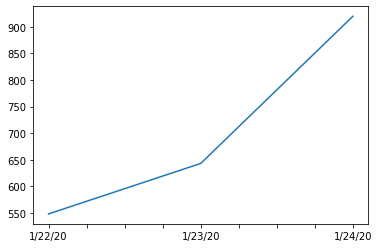

In [26]:
corona_dataset_computed.loc['China'][:3].plot()

<AxesSubplot:>

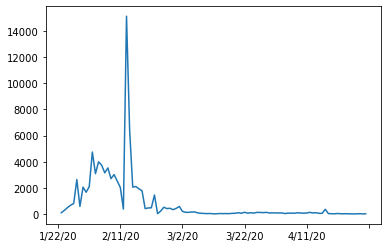

In [27]:
corona_dataset_computed.loc['China'].diff().plot()

### Maximum infection rate for all of the Nations

In [32]:
nations = list(corona_dataset_computed.index)
Max_infection_rates =[]
for n in nations:
    Max_infection_rates.append(corona_dataset_computed.loc[n].diff().max())
corona_dataset_computed["Max_infection_rate"]=max_infection_rates

In [33]:
corona_dataset_computed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate,Max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1279,1351,1463,1531,1703,1828,1939,2171,232.0,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,663,678,712,726,736,750,766,773,34.0,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,3007,3127,3256,3382,3517,3649,3848,4006,199.0,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,731,738,738,743,743,743,745,43.0,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,26,27,27,27,27,5.0,5.0


In [34]:
Data_Corona = pd.DataFrame(corona_dataset_computed["Max_infection_rate"])

In [35]:
Data_Corona.head()

,Max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### Importing Dataset for Happiness report 

In [63]:
world_happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [64]:
world_happiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [65]:
useless_cols =["Overall rank","Score","Generosity","Perceptions of corruption"]

In [66]:
world_happiness_report.drop(useless_cols,axis=1,inplace=True)
world_happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [67]:
world_happiness_report.set_index("Country or region",inplace=True)
world_happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


#### Dataset for Covid :

In [68]:
Data_Corona.shape

(187, 1)

#### Dataset for  World Happiness report :

In [69]:
world_happiness_report.shape

(156, 4)

In [92]:
Overall_Data = Data_Corona.join(world_happiness_report,how="inner")
Overall_Data.head(10)

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283
Australia,497.0,1.372,1.548,1.036,0.557
Austria,1321.0,1.376,1.475,1.016,0.532
Azerbaijan,105.0,1.043,1.147,0.769,0.351
Bahrain,301.0,1.362,1.368,0.871,0.536
Bangladesh,641.0,0.562,0.928,0.723,0.527


### Correlation matrix 

In [93]:
Overall_Data.corr()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

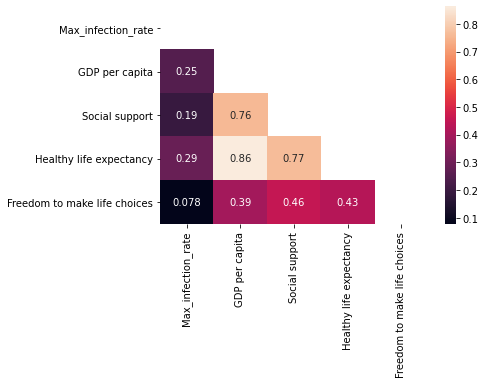

In [94]:
matrix = np.triu(Overall_Data.corr())
sns.heatmap(Overall_Data.corr(),annot = True,mask=matrix)

### Visualizing the results


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_infection_rate'>

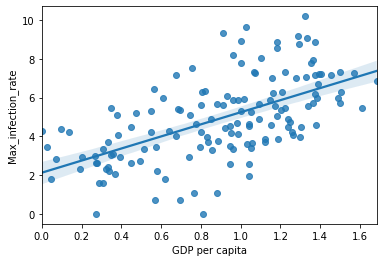

In [96]:
x=Overall_Data["GDP per capita"]
y=Overall_Data["Max_infection_rate"]
sns.regplot(x,np.log(y))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_infection_rate'>

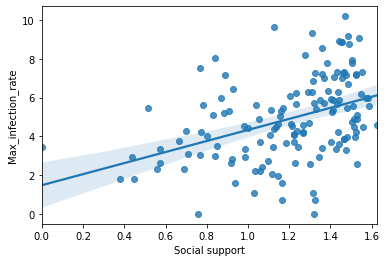

In [97]:
x=Overall_Data["Social support"]
y=Overall_Data["Max_infection_rate"]
sns.regplot(x,np.log(y))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Max_infection_rate'>

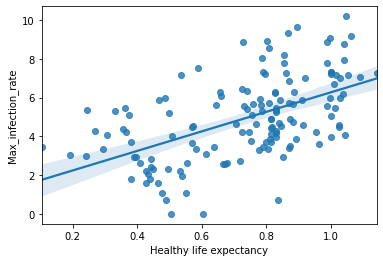

In [99]:
x=Overall_Data["Healthy life expectancy"]
y=Overall_Data["Max_infection_rate"]
sns.regplot(x,np.log(y))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Max_infection_rate'>

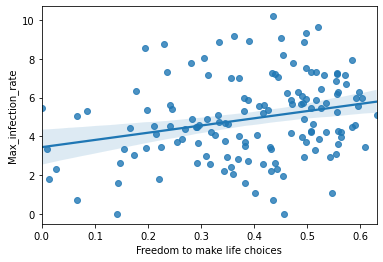

In [100]:
x=Overall_Data["Freedom to make life choices"]
y=Overall_Data["Max_infection_rate"]
sns.regplot(x,np.log(y))

## Analysing the Results from the above Figures

The results of the analysis are intriguing. People in industrialised countries (those with a lower happiness level) are more likely to contract the coronavirus than those in developing countries (higher happiness score). However, this can be countered by the fact that developed countries have more testing kits and, as a result, more reports. However, as seen in the graph below, the association between death rate and happiness score can be disproven. The death rate in developed countries is also greater.

In [109]:
death_data = pd.read_csv("covid19_deaths_dataset.csv")
death_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [110]:
death_data.drop(["Lat","Long"],axis=1,inplace=True)
death_data_computed = death_data.groupby("Country/Region").sum()  
nations_list = list(death_data_computed.index)
Max_death_rates =[]
for n in nations_list:
    Max_death_rates.append(death_data_computed.loc[n].diff().max())
death_data_computed["Max_death_rate"]=Max_death_rates
corona_death_data = pd.DataFrame(death_data_computed["Max_death_rate"])
corona_death_data.head()

,Max_death_rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


In [111]:
newdata = corona_death_data.join(world_happiness_report,how="inner")
newdata.head()

,Max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


In [112]:
newdata.corr()

,Max_death_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_death_rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='Max_death_rate'>

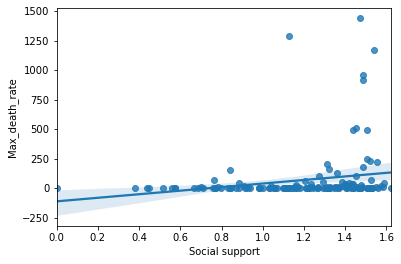

In [114]:
x=newdata["Social support"]
y=newdata["Max_death_rate"]
sns.regplot(x,y)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='Max_death_rate'>

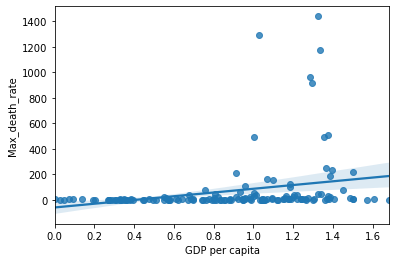

In [115]:
x=newdata["GDP per capita"]
y=newdata["Max_death_rate"]
sns.regplot(x,y)